In [26]:
%matplotlib notebook
import atomap.api as am
import hyperspy.api as hs

In [34]:
s = hs.load('9Frame Grabber 60 frames.dm3') 

<IPython.core.display.Javascript object>


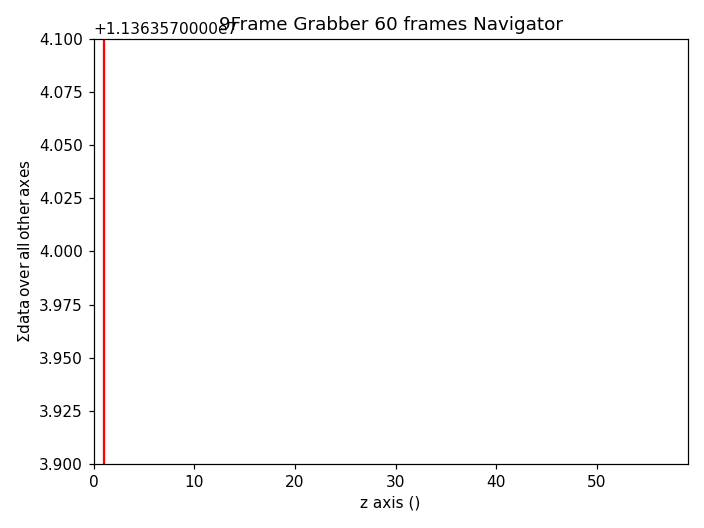

<IPython.core.display.Javascript object>


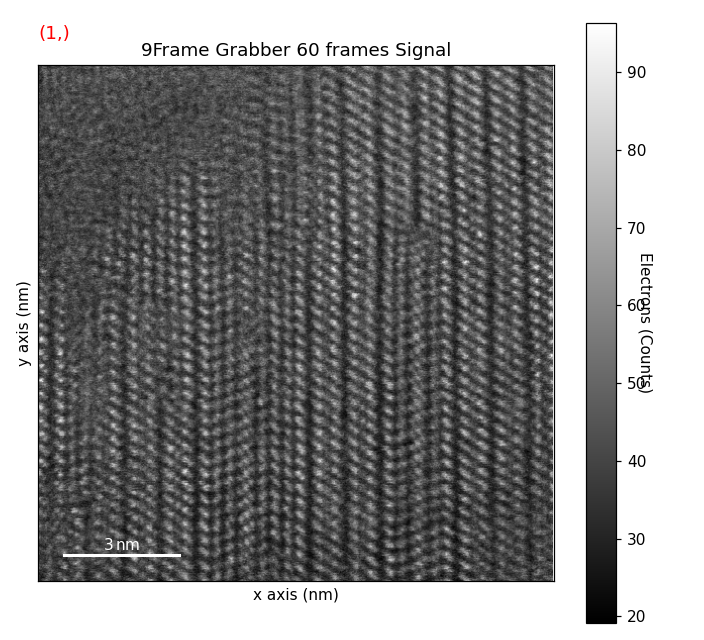

<Axes manager, axes: (60|512, 512)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               z |     60 |      0 |      -0 |       1 |        
---------------- | ------ | ------ | ------- | ------- | ------ 
               x |    512 |      0 |      -0 |   0.026 |     nm 
               y |    512 |      0 |      -0 |   0.026 |     nm

In [35]:
s.plot()
s.axes_manager #pixel size = 0.02622468769550323nm

In [36]:
shifts = s.estimate_shift2D(sub_pixel_factor=26)  #about 1 picometer accuracy

  0%|          | 0/60 [00:00<?, ?it/s]

[########################################] | 100% Completed |  0.6s


<IPython.core.display.Javascript object>


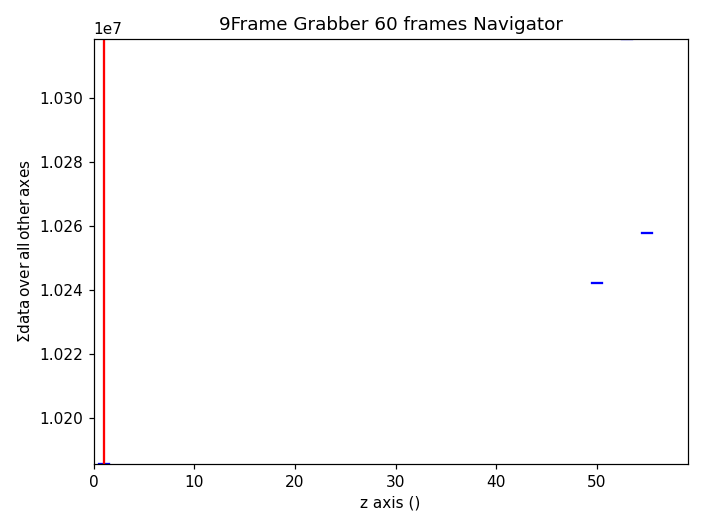

<IPython.core.display.Javascript object>


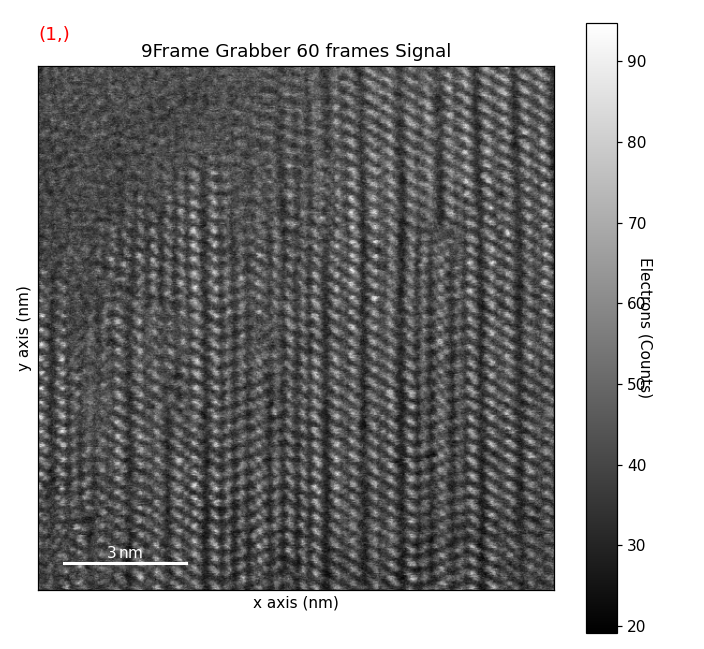

In [37]:
s_copy = s.copy()
s_copy.align2D(shifts=shifts)
s_copy.plot()

  0%|          | 0/60 [00:00<?, ?it/s]

[########################################] | 100% Completed |  0.5s


<IPython.core.display.Javascript object>


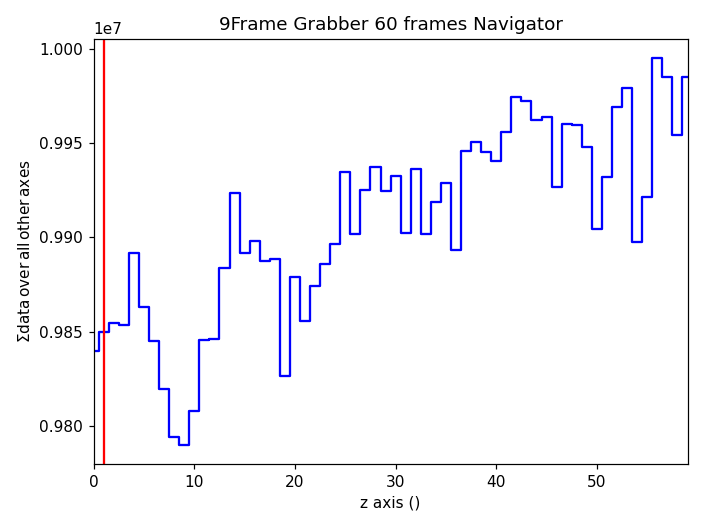

<IPython.core.display.Javascript object>


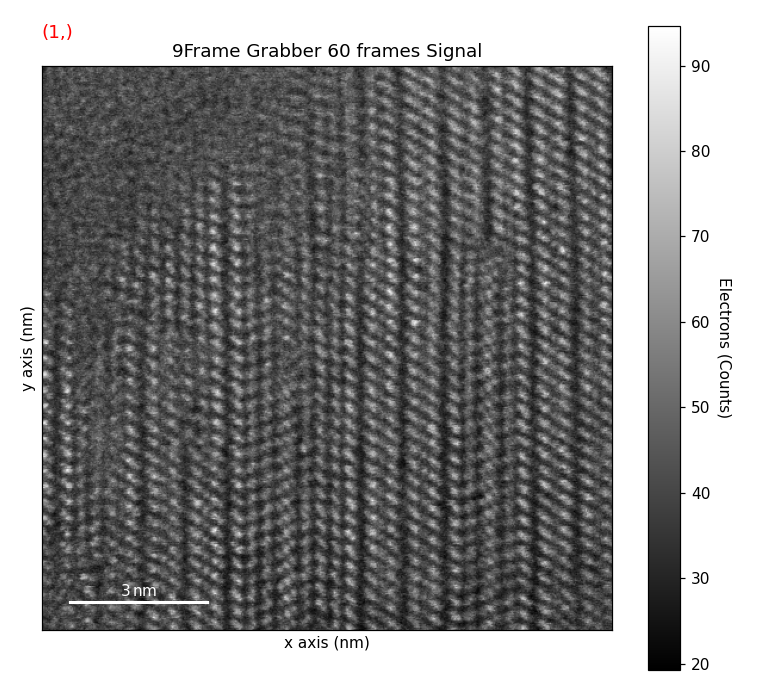

In [38]:
shifts = s_copy.estimate_shift2D(sub_pixel_factor=26)
s_copy = s_copy.copy()
s_copy.align2D(shifts=shifts)
s_copy.plot()

In [39]:
s_copy.save('9_registered_1pm.hspy')

<IPython.core.display.Javascript object>


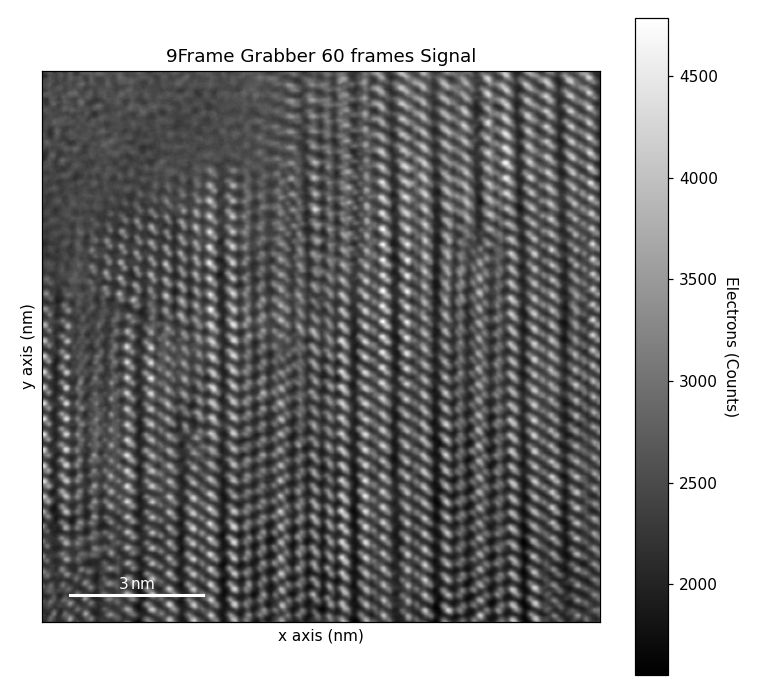

In [40]:
s_temp = s_copy.inav[0].copy()
s_temp = s_copy.sum(0)
s_temp.plot()

<IPython.core.display.Javascript object>


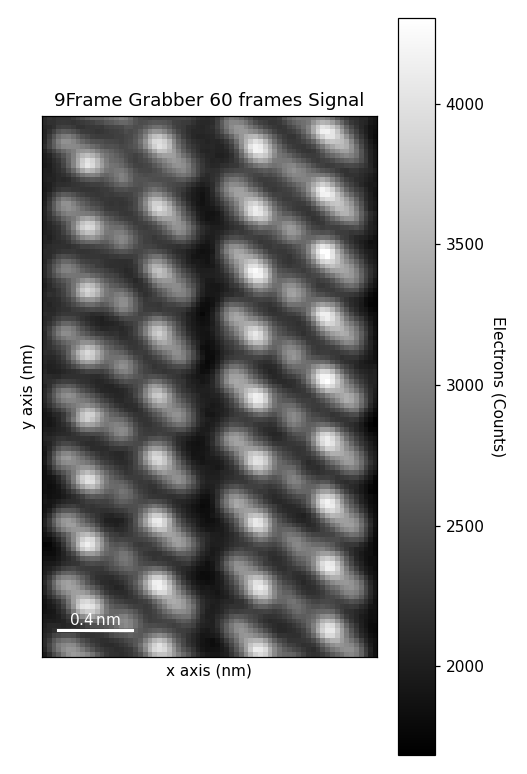

In [54]:
s_temp.isig[85:155,360:499].plot()

In [42]:
s_crop = s_temp.isig[85:155,360:499]

In [43]:
s_peaks = am.get_feature_separation(s_crop, separation_range=(1, 10), show_progressbar=False)

<IPython.core.display.Javascript object>


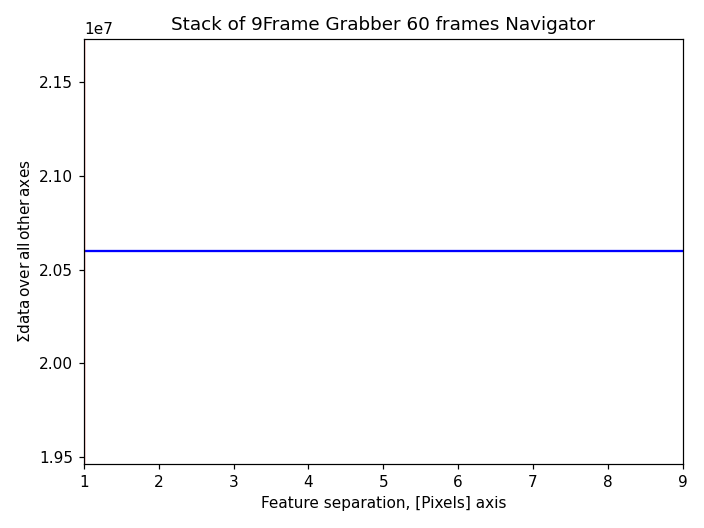

<IPython.core.display.Javascript object>


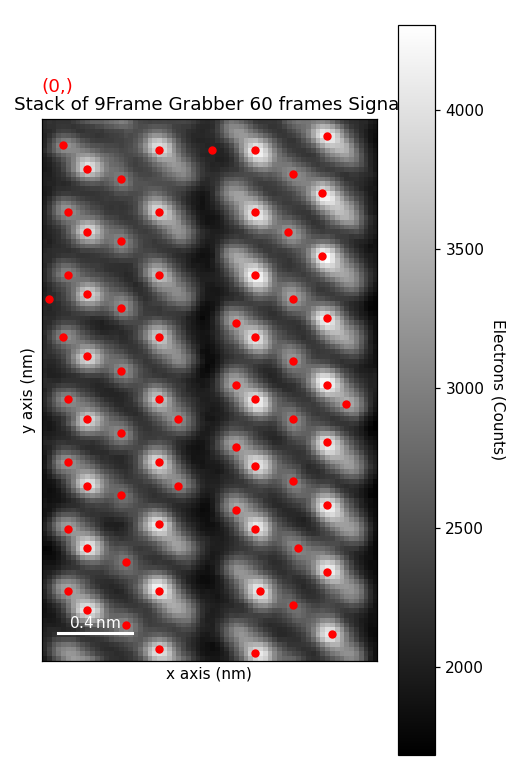

In [44]:
s_peaks.plot()

In [85]:
atom_positions = am.get_atom_positions(s_crop, 7)
atom_positions

array([[ 58,  28],
       [ 59,  55],
       [ 44,  32],
       [ 58,  15],
       [ 59,  80],
       [ 24,  98],
       [ 44,  58],
       [ 59,  94],
       [ 59,  41],
       [  9,  89],
       [ 44,  19],
       [ 59,  67],
       [ 45,  98],
       [ 24,  84],
       [ 44,  85],
       [ 44,  45],
       [  9, 102],
       [  9,  10],
       [ 44,  72],
       [  9,  76],
       [ 24,  19],
       [  9,  23],
       [  9,  49],
       [ 24,  71],
       [  9,  36],
       [  9,  62],
       [ 24,  45],
       [ 24,  58],
       [ 24,  32]], dtype=int64)

In [140]:
blue_x_1,blue_y_1 = loaded_blue_coord[0][0],loaded_blue_coord[0][1]
red_x_1,red_y_1  = loaded_red_coord[0][0],loaded_red_coord[0][1]
blue_x_2,blue_y_2 = loaded_blue_coord[1][0], loaded_blue_coord[1][1]
red_x_2,red_y_2  = loaded_red_coord[1][0],loaded_red_coord[1][1]
blue_x_3,blue_y_3 = loaded_blue_coord[2][0],loaded_blue_coord[2][1]
red_x_3,red_y_3  = loaded_red_coord[2][0],loaded_red_coord[2][1]
blue_x_4,blue_y_4 = loaded_blue_coord[3][0], loaded_blue_coord[3][1]
red_x_4,red_y_4  = loaded_red_coord[3][0],loaded_red_coord[3][1]
atom_positions_A=[(red_x_1.tolist(),red_y_1.tolist()),(red_x_2.tolist(),red_y_2.tolist()),
                  (red_x_3.tolist(),red_y_3.tolist()),(red_x_4.tolist(),red_y_4.tolist())]
atom_positions_B=[(blue_x_1.tolist(),blue_y_1.tolist()),(blue_x_2.tolist(),blue_y_2.tolist()),
                  (blue_x_3.tolist(),blue_y_3.tolist()),(blue_x_4.tolist(),blue_y_4.tolist())]
red_coordinations = []
blue_coordinations = []
for i in range(len(atom_positions_A)):
    x = atom_positions_A[i][0]
    y = atom_positions_A[i][1]
    for j in range(len(x)):
        cood = (x[j],y[j])
        red_coordinations.append(cood)
        
for i in range(len(atom_positions_B)):
    x = atom_positions_B[i][0]
    y = atom_positions_B[i][1]
    for j in range(len(x)):
        cood = (x[j],y[j])
        blue_coordinations.append(cood)
red_coordinations.pop()
red_coordinations.pop(7)
blue_coordinations


[(4.243355676829458, 4.855559643141826),
 (4.297367302268911, 18.06211669136963),
 (4.4247582692519005, 31.275703178967255),
 (4.3050304326421305, 44.38667565961228),
 (4.32035254288254, 57.812100996520776),
 (4.320947331564282, 70.74957442748601),
 (4.465642362234888, 84.0724983387213),
 (4.343134593501081, 96.98532374364468),
 (4.273545662262487, 110.18755741175363),
 (39.629304144237985, 1.5082198171379546),
 (39.411454417258014, 27.73120782771374),
 (39.26716811145774, 41.00525676340273),
 (39.40706424000653, 66.78120074681183),
 (40.085152662467976, 93.17661428287653),
 (40.29601619929296, 106.10075464782622),
 (40.96293528896614, 120.3395753841515),
 (39.16340514939496, 14.410552029205931),
 (39.26411845149307, 53.92826868062208),
 (39.603886895618544, 79.78708679797639),
 (28.316478684452807, 115.61347533564664),
 (28.288783195977533, 49.591486740727206),
 (28.45768838695807, 23.33997177062114),
 (28.75397068839296, 10.204174734104708),
 (28.716338609492492, 36.52957577827739),


<IPython.core.display.Javascript object>


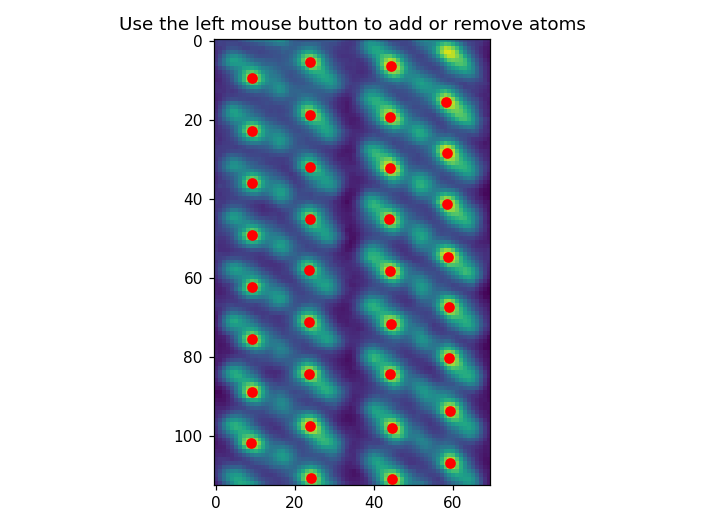

In [141]:
atom_positions_A = am.add_atoms_with_gui(s_crop, red_coordinations)

In [144]:
sublattice_In = am.Sublattice(atom_positions_A, image=s_crop.data)
sublattice_In

<Sublattice,  (atoms:34,planes:0)>

In [65]:
s_crop.axes_manager
x_offset = s_crop.axes_manager[0].offset
y_offset = s_crop.axes_manager[1].offset
x_scale = s_crop.axes_manager[0].scale
y_scale = s_crop.axes_manager[1].scale

In [68]:
sublattice_In.find_nearest_neighbors()
sublattice_In.refine_atom_positions_using_center_of_mass(percent_to_nn=0.2)
sublattice_In.refine_atom_positions_using_2d_gaussian(percent_to_nn=0.2)

Center of mass:   0%|          | 0/31 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


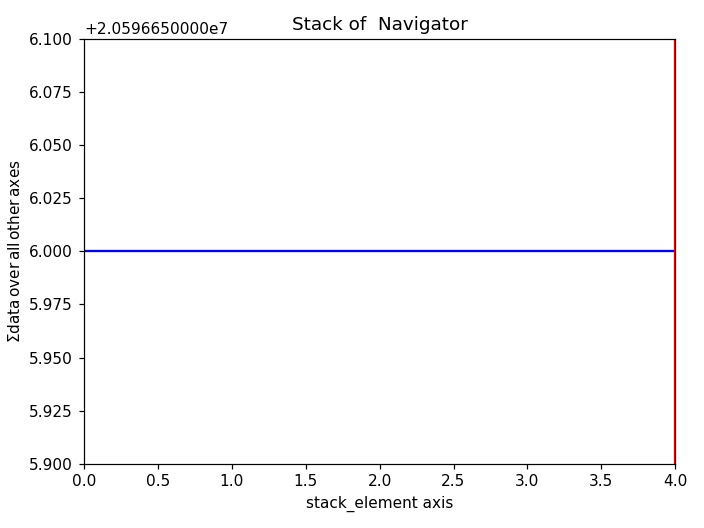

<IPython.core.display.Javascript object>


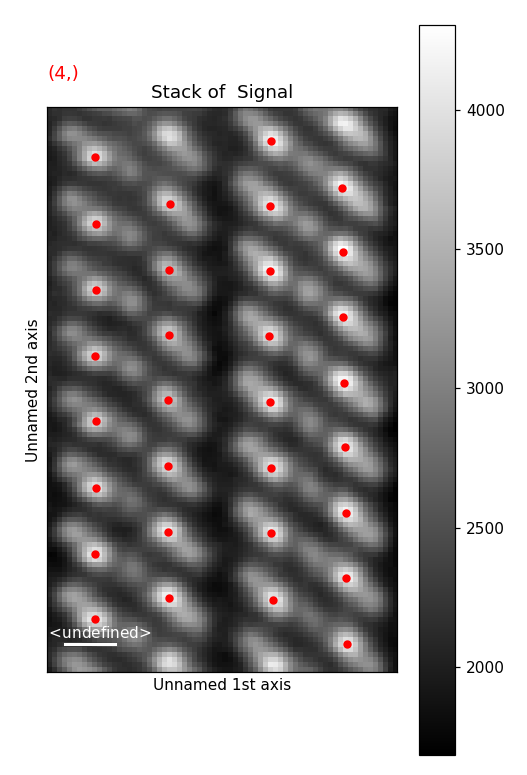

In [69]:
sublattice_In.get_position_history().plot()

In [145]:
sublattice_In.construct_zone_axes(atom_plane_tolerance=2)
sublattice_In

<Sublattice,  (atoms:34,planes:7)>

<IPython.core.display.Javascript object>


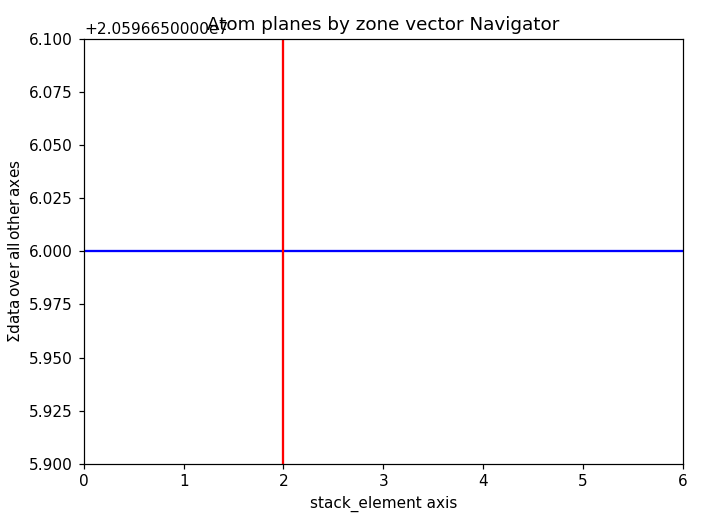

<IPython.core.display.Javascript object>


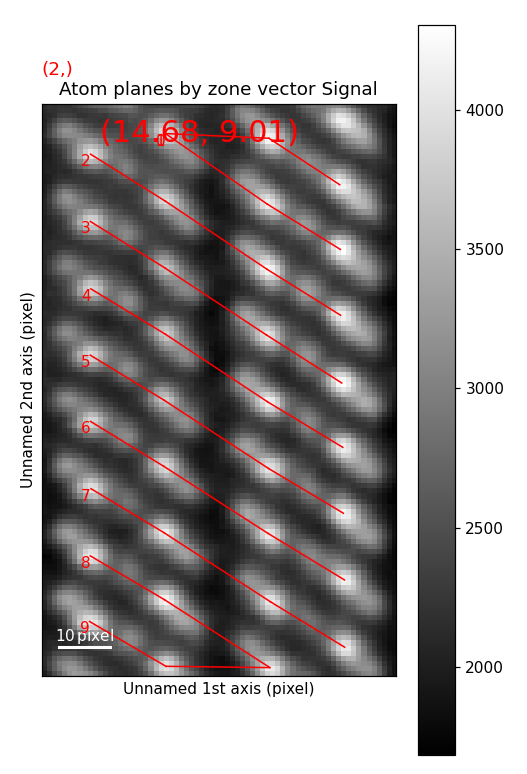

In [146]:
sublattice_In.plot_planes()

In [147]:
zone_axis_001 = sublattice_In.zones_axis_average_distances[2]
B_positions = sublattice_In.find_missing_atoms_from_zone_vector(zone_axis_001)

In [148]:
B_positions = blue_coordinations

In [155]:
image_without_A.shape[0]

113

<IPython.core.display.Javascript object>


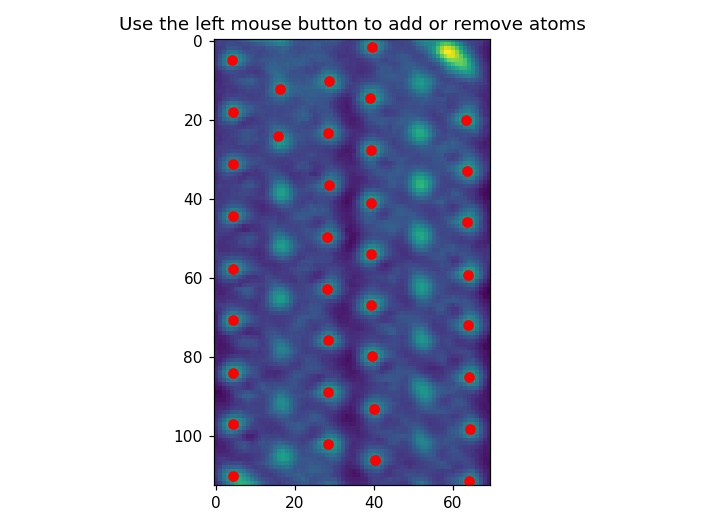

In [189]:
from atomap.initial_position_finding import AtomAdderRemover
asss=AtomAdderRemover(image_without_A, B_positions)

<IPython.core.display.Javascript object>


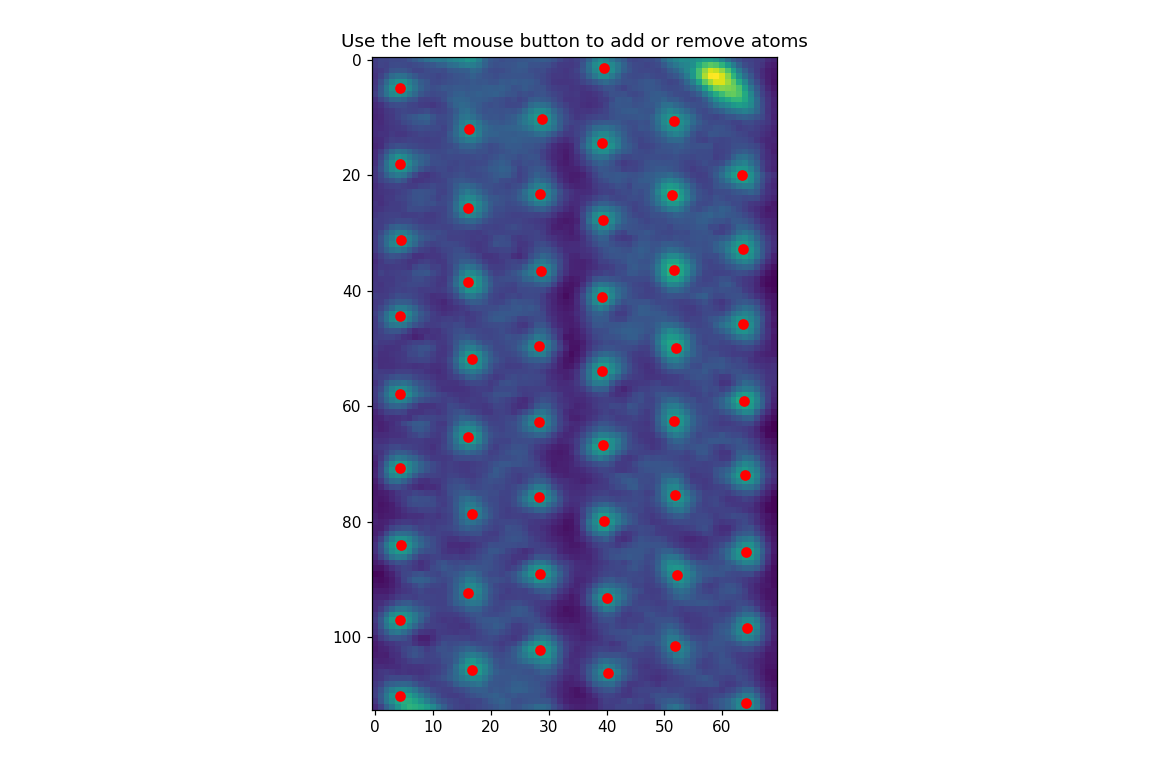

In [191]:
B_positions=am.add_atoms_with_gui(image_without_A, B_positions)

In [178]:
from atomap.tools import remove_atoms_from_image_using_2d_gaussian
image_without_A = remove_atoms_from_image_using_2d_gaussian(sublattice_In.image, sublattice_In)

SyntaxError: invalid syntax (Temp/ipykernel_8284/2847259005.py, line 2)

In [193]:
sublattice_B = am.Sublattice(B_positions, image_without_A, color='blue')
sublattice_B.find_nearest_neighbors()
#sublattice_B.construct_zone_axes()
sublattice_B.refine_atom_positions_using_center_of_mass(percent_to_nn=0.4)
sublattice_B.refine_atom_positions_using_2d_gaussian(percent_to_nn=0.4)

Center of mass:   0%|          | 0/50 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


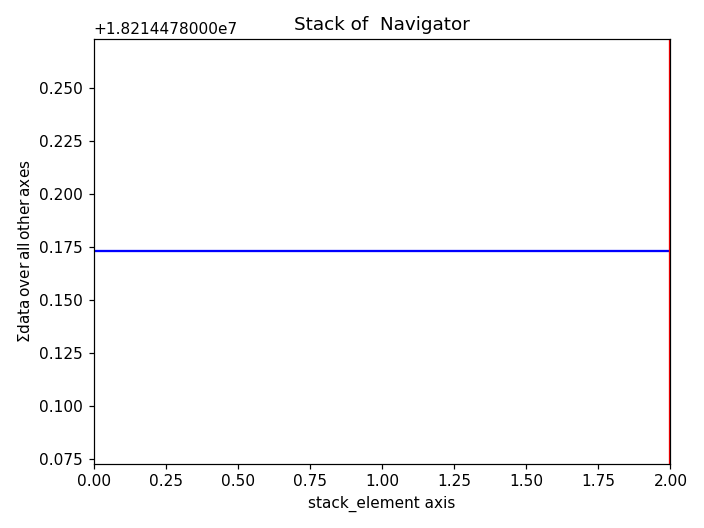

<IPython.core.display.Javascript object>


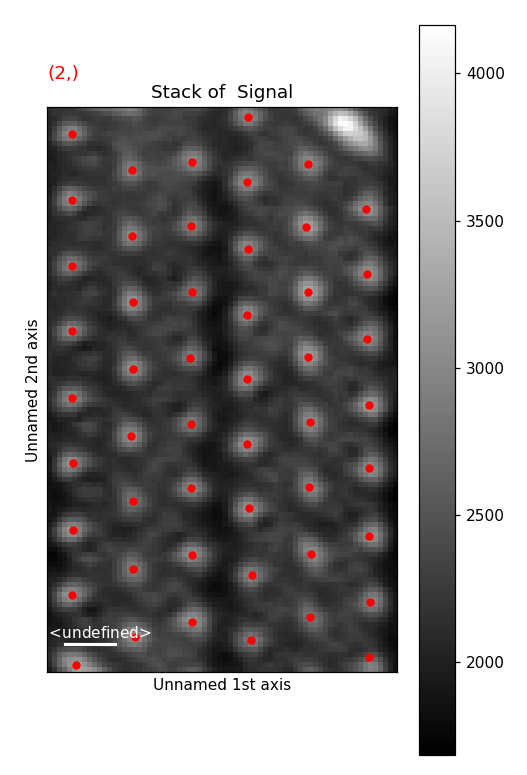

In [194]:
sublattice_B.get_position_history().plot()

<IPython.core.display.Javascript object>


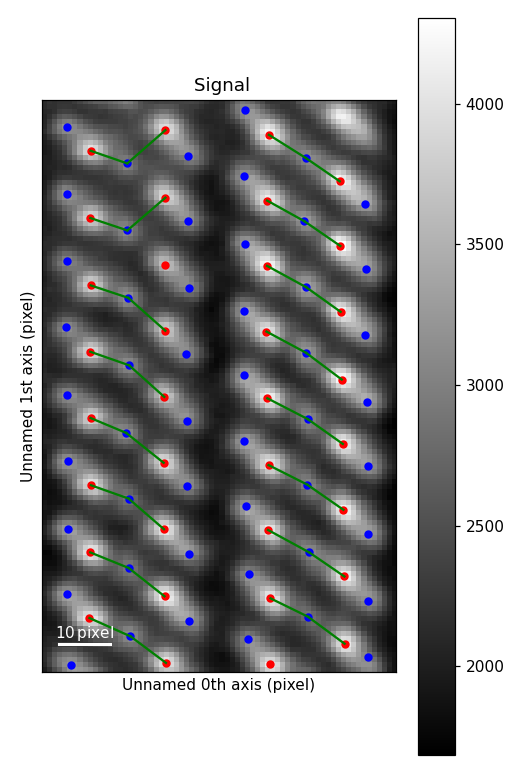

In [205]:
%matplotlib notebook
atom_lattice = am.Atom_Lattice(image=s_crop.data, name='test', sublattice_list=[sublattice_In, sublattice_B])
atom_lattice.plot()

In [196]:
atom_lattice.save("atom_lattice-beta-full.hdf5", overwrite=True)

In [77]:
atom_position_list = sublattice_In.atom_list
atom_position = atom_position_list[0]

In [198]:
sublattice_A = atom_lattice.sublattice_list[0]
x = sublattice_A.x_position
y = sublattice_A.y_position


In [219]:
import numpy as np
blue_columns_x_ranges = [(3, 5), (38, 41), (27,30),(62,65)]
red_columns_x_ranges = [(8, 10), (43, 45),(22,25),(58,60)]
blue_coord = []
red_coord = []


# Function to slice the positions based on x range and calculate distances
def calculate_distances(sublattice_A, sublattice_B, blue_ranges, red_ranges):
    distances = []
    for blue_range, red_range in zip(blue_ranges, red_ranges):
        # Slice the x positions based on the given range
        blue_x = sublattice_B.x_position[(sublattice_B.x_position >= blue_range[0]) & (sublattice_B.x_position <= blue_range[1])]
        red_x = sublattice_A.x_position[(sublattice_A.x_position >= red_range[0]) & (sublattice_A.x_position <= red_range[1])]
        
        # Assuming that the y positions follow the same order as x positions
        blue_y = sublattice_B.y_position[(sublattice_B.x_position >= blue_range[0]) & (sublattice_B.x_position <= blue_range[1])]
        red_y = sublattice_A.y_position[(sublattice_A.x_position >= red_range[0]) & (sublattice_A.x_position <= red_range[1])]
        blue_coord.append((blue_x,blue_y))
        red_coord.append((red_x,red_y))
        # Calculate distances between all pairs of blue and red dots within the sliced range
        for bx, by in zip(blue_x, blue_y):
            for rx, ry in zip(red_x, red_y):
                distance = np.sqrt((bx - rx)**2 + (by - ry)**2)
                distances.append(distance)
    return distances

# Call the function and calculate distances
distances = calculate_distances(sublattice_A, sublattice_B, blue_columns_x_ranges, red_columns_x_ranges)
blue_x_1,blue_y_1 = blue_coord[0][0],blue_coord[0][1]
red_x_1,red_y_1  = red_coord[0][0],red_coord[0][1]
blue_x_2,blue_y_2 = blue_coord[1][0], blue_coord[1][1]
red_x_2,red_y_2  = red_coord[1][0],red_coord[1][1]
blue_x_3,blue_y_3 = blue_coord[2][0],blue_coord[2][1]
red_x_3,red_y_3  = red_coord[2][0],red_coord[2][1]
blue_x_4,blue_y_4 = blue_coord[3][0], blue_coord[3][1]
red_x_4,red_y_4  = red_coord[3][0],red_coord[3][1]

In [218]:
import numpy as np
blue_columns_x_ranges = [(3, 5), (38, 41), (27,30),(62,65)]
red_columns_x_ranges = [(8, 10), (43, 45),(22,25),(58,60)]
blue_coord = []
red_coord = []
blue_columns_cx_ranges = [(14, 18), (48, 55)]
blue_ccoord = []



# Function to slice the positions based on x range and calculate distances
def calculate_distances(sublattice_A, sublattice_B, blue_ranges, red_ranges, center_ranges):
    distances_side = []
    distances_center = []  # Assuming you intend to use this for some calculations

    # Process side columns
    for blue_range, red_range in zip(blue_ranges, red_ranges):
        # Extract positions based on x range
        blue_x = sublattice_B.x_position[(sublattice_B.x_position >= blue_range[0]) & (sublattice_B.x_position <= blue_range[1])]
        red_x = sublattice_A.x_position[(sublattice_A.x_position >= red_range[0]) & (sublattice_A.x_position <= red_range[1])]
        
        blue_y = sublattice_B.y_position[(sublattice_B.x_position >= blue_range[0]) & (sublattice_B.x_position <= blue_range[1])]
        red_y = sublattice_A.y_position[(sublattice_A.x_position >= red_range[0]) & (sublattice_A.x_position <= red_range[1])]
        
        # Store coordinates
        blue_coord.append((blue_x, blue_y))
        red_coord.append((red_x, red_y))
        
        # Calculate distances for side columns
        for bx, by, rx, ry in zip(blue_x, blue_y, red_x, red_y):
            distance = np.sqrt((bx - rx)**2 + (by - ry)**2)
            distances_side.append(distance)

    # Process center columns
    for center_range in center_ranges:
        blue_center_x = sublattice_B.x_position[(sublattice_B.x_position >= center_range[0]) & (sublattice_B.x_position <= center_range[1])]
        blue_center_y = sublattice_B.y_position[(sublattice_B.x_position >= center_range[0]) & (sublattice_B.x_position <= center_range[1])]
        
        # Assuming we need to find the nearest red points for each blue center point
        for bx, by in zip(blue_center_x, blue_center_y):
            nearest_red_indices = find_nearest_two_points(bx, by, red_x, red_y)  # This needs red_x, red_y from the last loop, which might not be correct
            # Assuming distance calculation was meant to be here, but `distance` variable is not updated in this loop.
            # Perform necessary calculations and append results to distances_center

        blue_centers_coord.append((blue_center_x, blue_center_y))  # Correctly append tuples

    return distances_side, distances_center

distances_c = calculate_distances(sublattice_A, sublattice_B, blue_columns_cx_ranges, red_columns_x_ranges)
blue_cx_1,blue_cy_1 = blue_ccoord[0][0],blue_ccoord[0][1]
blue_cx_2,blue_cy_2 = blue_ccoord[1][0], blue_ccoord[1][1]

IndexError: list index out of range

In [215]:
def find_nearest_two_points(x, y, points_x, points_y):
    distances = np.sqrt((x - points_x) ** 2 + (y - points_y) ** 2)
    nearest_indices = np.argsort(distances)[:2]  # Get indices of nearest two points
    return nearest_indices
def plot_center_to_nearest_reds(blue_center_x, blue_center_y, red_x, red_y, color, x_scale):
    distance_list = []
    # Assuming red_x, red_y are the overall red dots, not sorted per segment as before
    for bcx, bcy in zip(blue_center_x, blue_center_y):
        distances = [distance(bcx, rx, bcy, ry) for rx, ry in zip(red_x, red_y)]
        nearest_two_indices = np.argsort(distances)[:2]  # Get indices of the nearest two red dots
        
        for idx in nearest_two_indices:
            plt.plot([bcx, red_x[idx]], [bcy, red_y[idx]], color)  # Plot line to each of the two nearest red dots
            distance_list.append(distances[idx] * x_scale)  # Scale and append the distance
    
    return distance_list

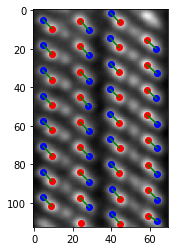

In [201]:
%matplotlib inline
import numpy as np
from math import sqrt

def sort_dots(x, y):
    sorted_indices = np.argsort(y)
    sorted_x = x[sorted_indices]
    sorted_y = y[sorted_indices]
    return sorted_x, sorted_y

def distance(x1, x2, y1, y2):
    return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def plot_distances(blue_x, blue_y, red_x, red_y, color, x_scale):
    sorted_blue_x, sorted_blue_y = sort_dots(blue_x, blue_y)
    sorted_red_x, sorted_red_y = sort_dots(red_x, red_y)
    distance_list = []
    
    for bx, by, rx, ry in zip(sorted_blue_x, sorted_blue_y, sorted_red_x, sorted_red_y):
        plt.plot([bx, rx], [by, ry], color)
        distance_list.append(distance(bx, rx, by, ry) * x_scale)
    return distance_list

import matplotlib.pyplot as plt

plt.imshow(s_crop.data, cmap='gray')
plt.scatter(blue_x_1,blue_y_1,color='b' )
plt.scatter(red_x_1,red_y_1,color='r' )
plt.scatter(blue_x_2,blue_y_2,color='b' )
plt.scatter(red_x_2,red_y_2,color='r' )
plt.scatter(blue_x_3,blue_y_3,color='b' )
plt.scatter(red_x_3,red_y_3,color='r' )
plt.scatter(blue_x_4,blue_y_4,color='b' )
plt.scatter(red_x_4,red_y_4,color='r' )
distance_list = []
distance_list.extend(plot_distances(blue_x_1, blue_y_1, red_x_1, red_y_1, 'g-', x_scale))
distance_list.extend(plot_distances(blue_x_2, blue_y_2, red_x_2, red_y_2, 'g-', x_scale))
distance_list.extend(plot_distances(blue_x_3, blue_y_3, red_x_3, red_y_3, 'g-', x_scale))
distance_list.extend(plot_distances(blue_x_4, blue_y_4, red_x_4, red_y_4, 'g-', x_scale))
plt.savefig('Figure1.tif')

In [216]:
all_red_x = np.concatenate([red_x_1, red_x_2, red_x_3, red_x_4])
all_red_y = np.concatenate([red_y_1, red_y_2, red_y_3, red_y_4])
distance_list_center = []
distance_list_center.extend(plot_center_to_nearest_reds(blue_cx_1, blue_cy_1, all_red_x, all_red_y, 'g-', x_scale))
distance_list_center.extend(plot_center_to_nearest_reds(blue_cx_2, blue_cy_2, all_red_x, all_red_y, 'g-', x_scale))

In [202]:
import pickle

with open("blue_coord.pkl", "wb") as f:
    pickle.dump(blue_coord, f)
    pickle.dump(red_coord, f)

In [203]:
np.savez("blue_coord.npz", *blue_coord)
np.savez("red_coord.npz", *red_coord)

In [204]:
import statistics
distance_list
print('count =',len(distance_list),f'average = {round(statistics.mean(distance_list),3)}nm',
      f'std = {round(statistics.stdev(distance_list),3)}nm')
np.savetxt('1st distance',distance_list)

count = 33 average = 0.171nm std = 0.008nm


<IPython.core.display.Javascript object>


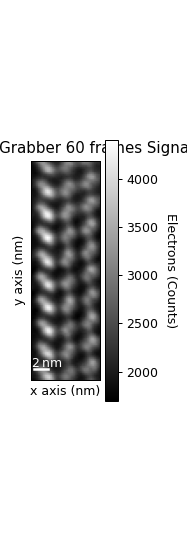

In [125]:
%matplotlib notebook
s_temp.isig[155:195,360:499].plot()

In [126]:
s_crop2 = s_temp.isig[155:195,360:499]

In [127]:
s_peaks2 = am.get_feature_separation(s_crop2, separation_range=(1, 10), show_progressbar=False)

<IPython.core.display.Javascript object>


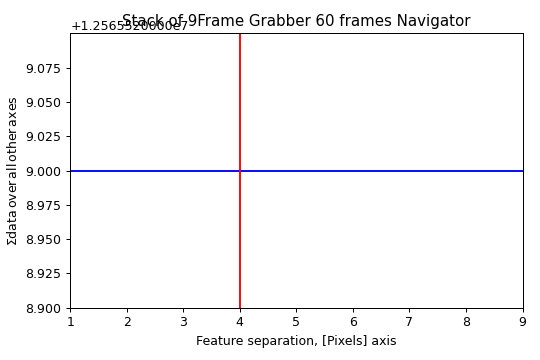

<IPython.core.display.Javascript object>


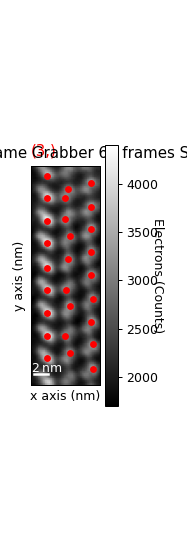

In [128]:
s_peaks2.plot()

<IPython.core.display.Javascript object>


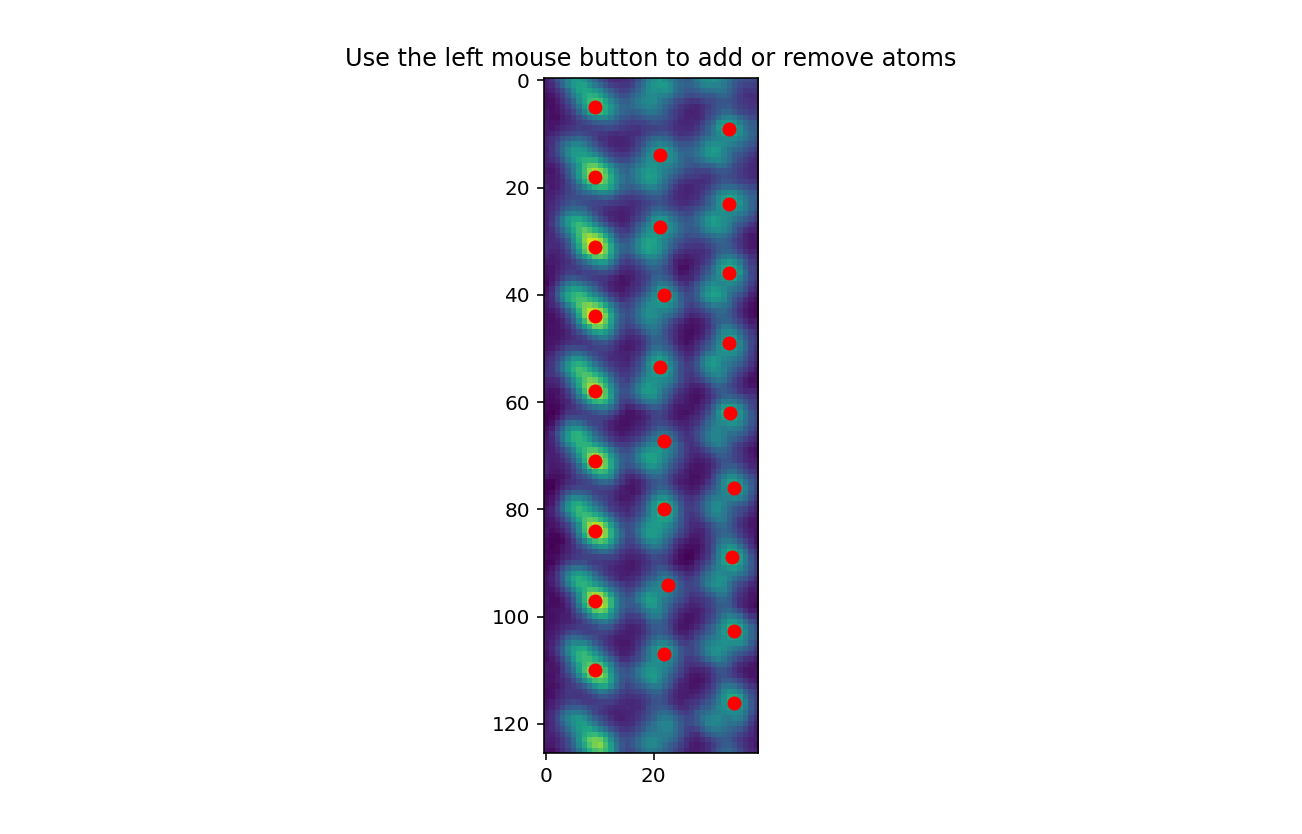

In [217]:
atom_positions2 = am.get_atom_positions(s_crop2, 4)
atom_positions_A2 = am.add_atoms_with_gui(s_crop2, atom_positions2)

In [218]:
sublattice_In2 = am.Sublattice(atom_positions_A2, image=s_crop2.data)

In [219]:

sublattice_In2.find_nearest_neighbors()
sublattice_In2.refine_atom_positions_using_center_of_mass(percent_to_nn=0.1)
sublattice_In2.refine_atom_positions_using_2d_gaussian(percent_to_nn=0.1)

Center of mass:   0%|          | 0/26 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


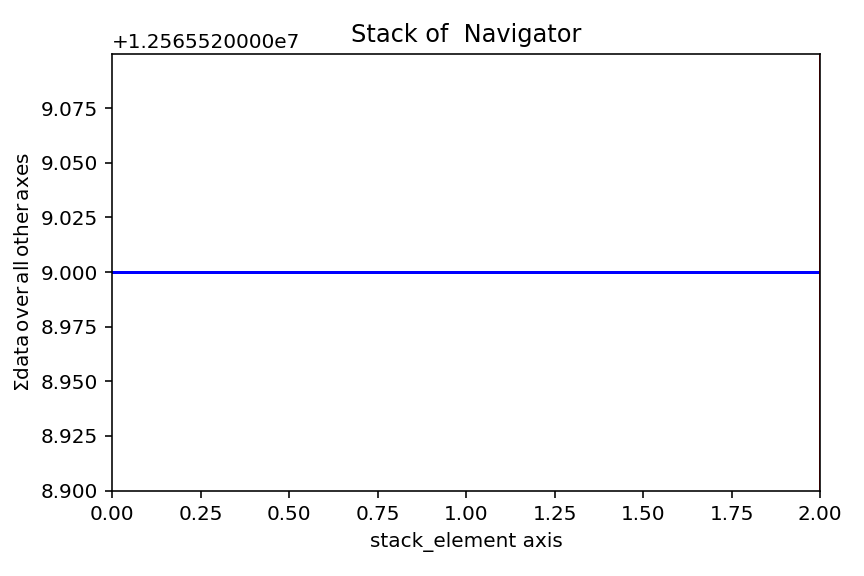

<IPython.core.display.Javascript object>


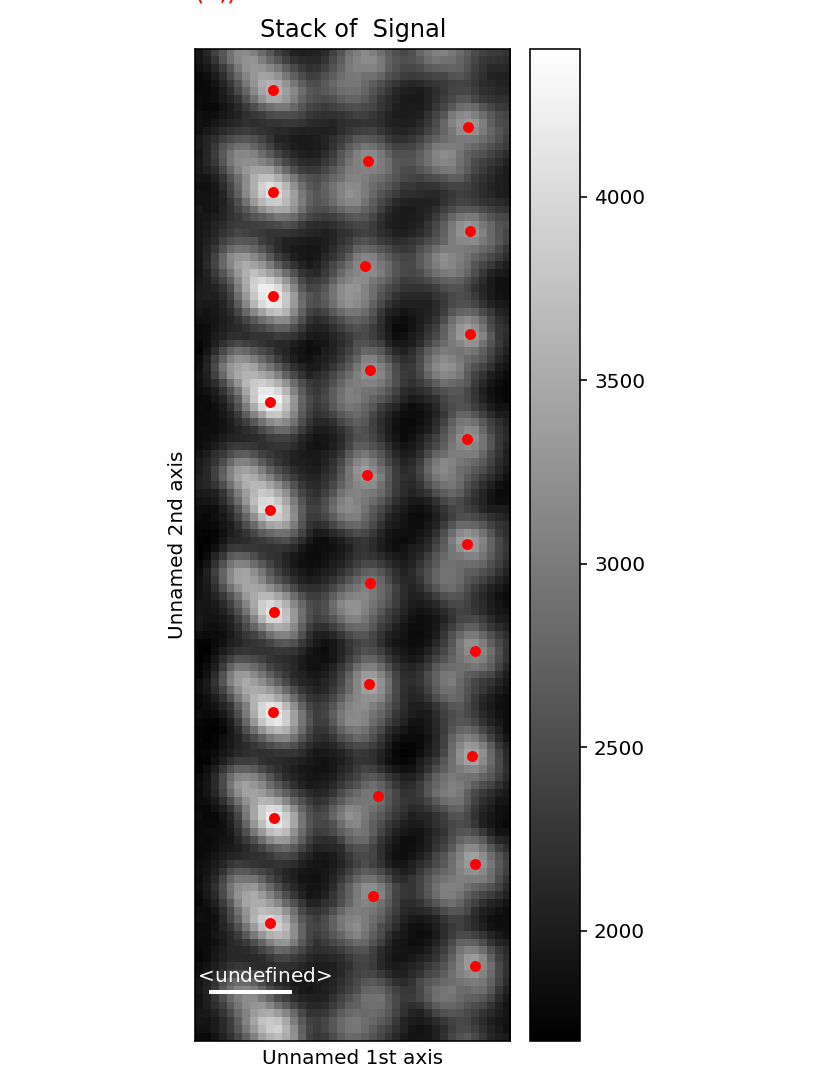

In [220]:
sublattice_In2.get_position_history().plot()

In [221]:
sublattice_In2.construct_zone_axes(atom_plane_tolerance=2)
sublattice_In2

<Sublattice,  (atoms:26,planes:6)>

In [222]:
from atomap.tools import remove_atoms_from_image_using_2d_gaussian
image_without_A2 = remove_atoms_from_image_using_2d_gaussian(sublattice_In2.image, sublattice_In2,percent_to_nn=0.5)

Subtracting atoms:   0%|          | 0/26 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


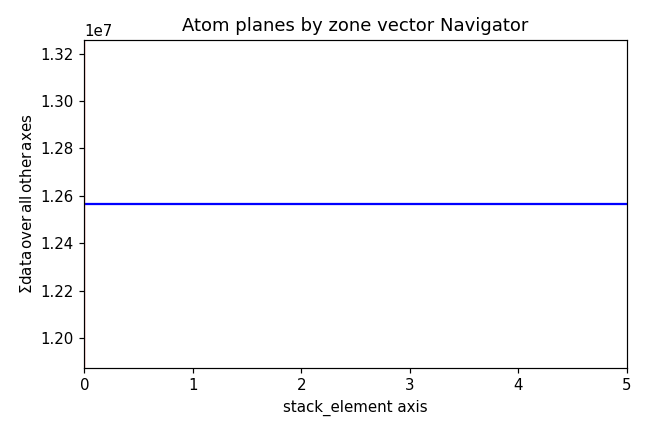

<IPython.core.display.Javascript object>


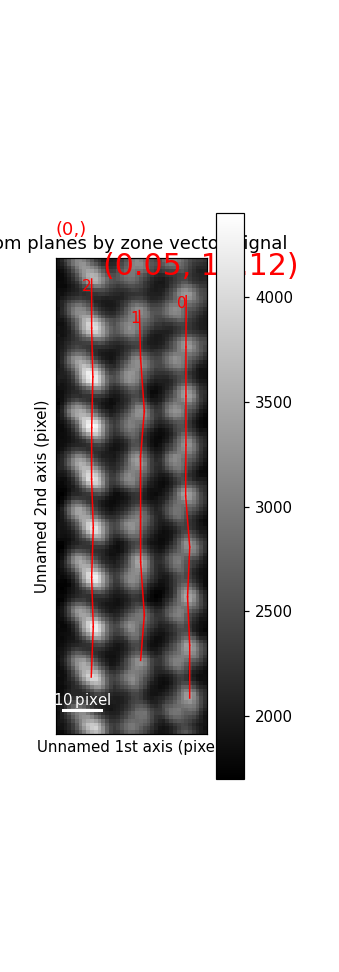

In [167]:
sublattice_In2.plot_planes()

In [223]:
zone_axis_001_2 = sublattice_In2.zones_axis_average_distances[1]
B_positions2 = sublattice_In2.find_missing_atoms_from_zone_vector(zone_axis_001_2)

<IPython.core.display.Javascript object>


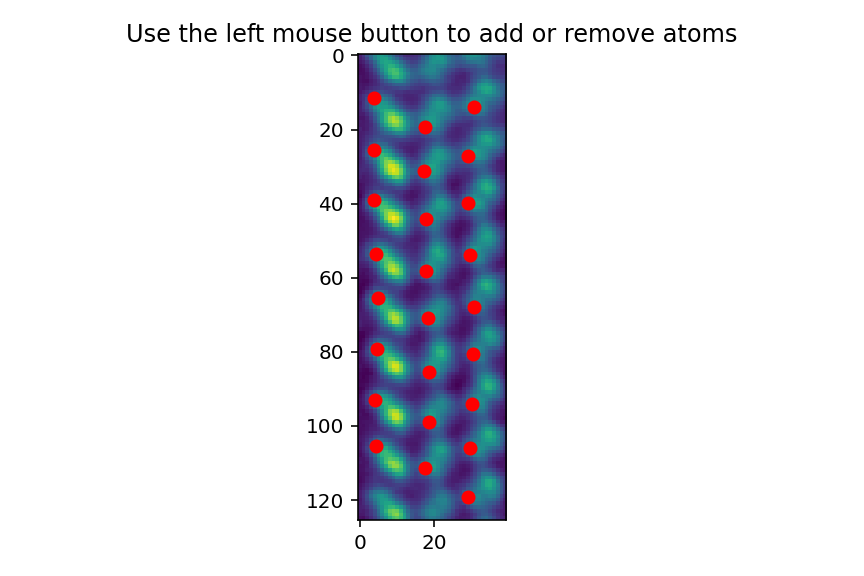

In [234]:
B_positions22=am.add_atoms_with_gui(sublattice_In2.image, B_positions2)

<IPython.core.display.Javascript object>


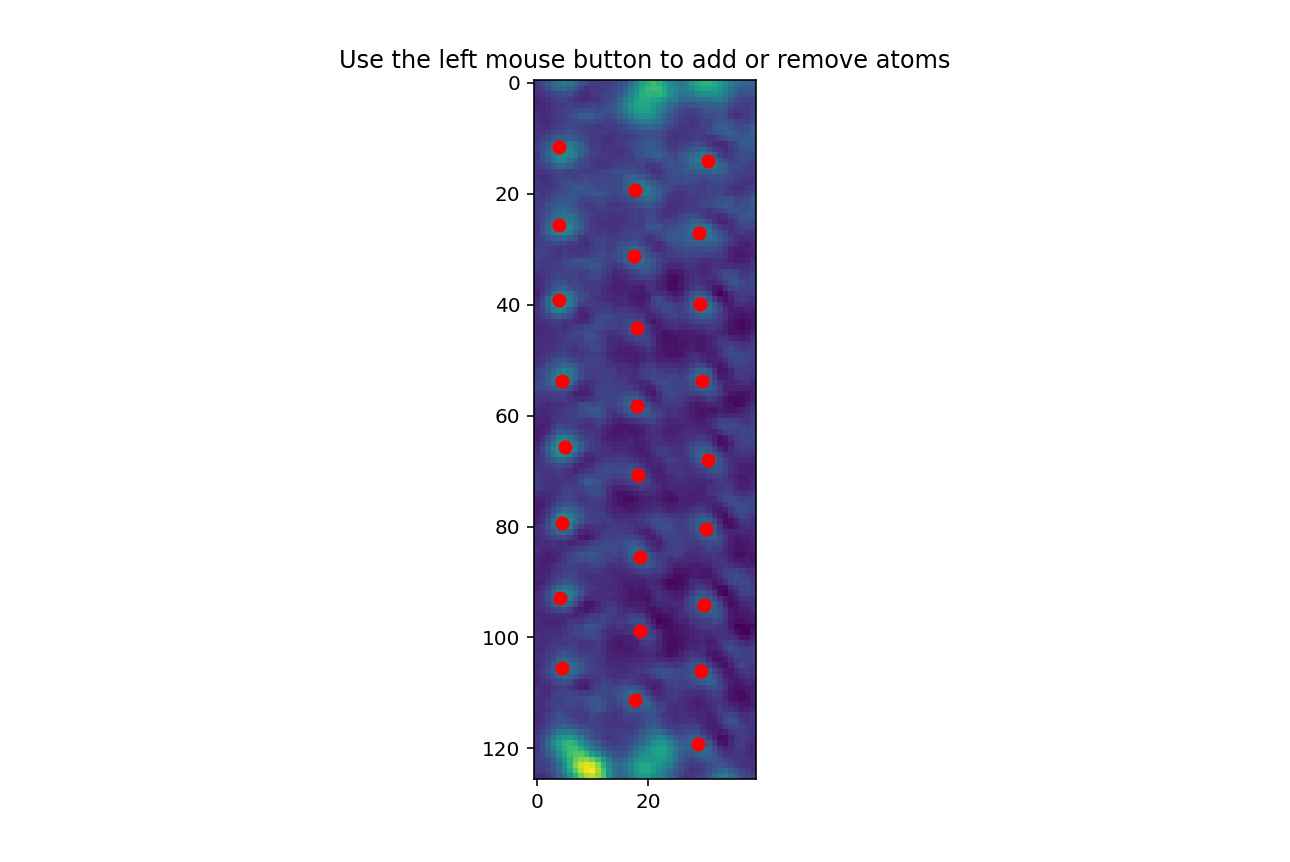

In [235]:
B_positions2=am.add_atoms_with_gui(image_without_A2, B_positions22)

In [247]:
sublattice_B2 = am.Sublattice(B_positions2, sublattice_In2.image, color='blue')
sublattice_B2.find_nearest_neighbors()
#sublattice_B.construct_zone_axes()
sublattice_B2.refine_atom_positions_using_center_of_mass(percent_to_nn=0.2)
sublattice_B2.refine_atom_positions_using_2d_gaussian(percent_to_nn=0.2)

Center of mass:   0%|          | 0/25 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


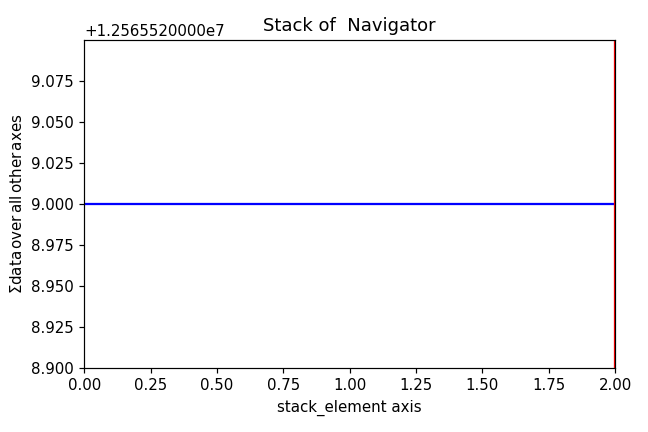

<IPython.core.display.Javascript object>


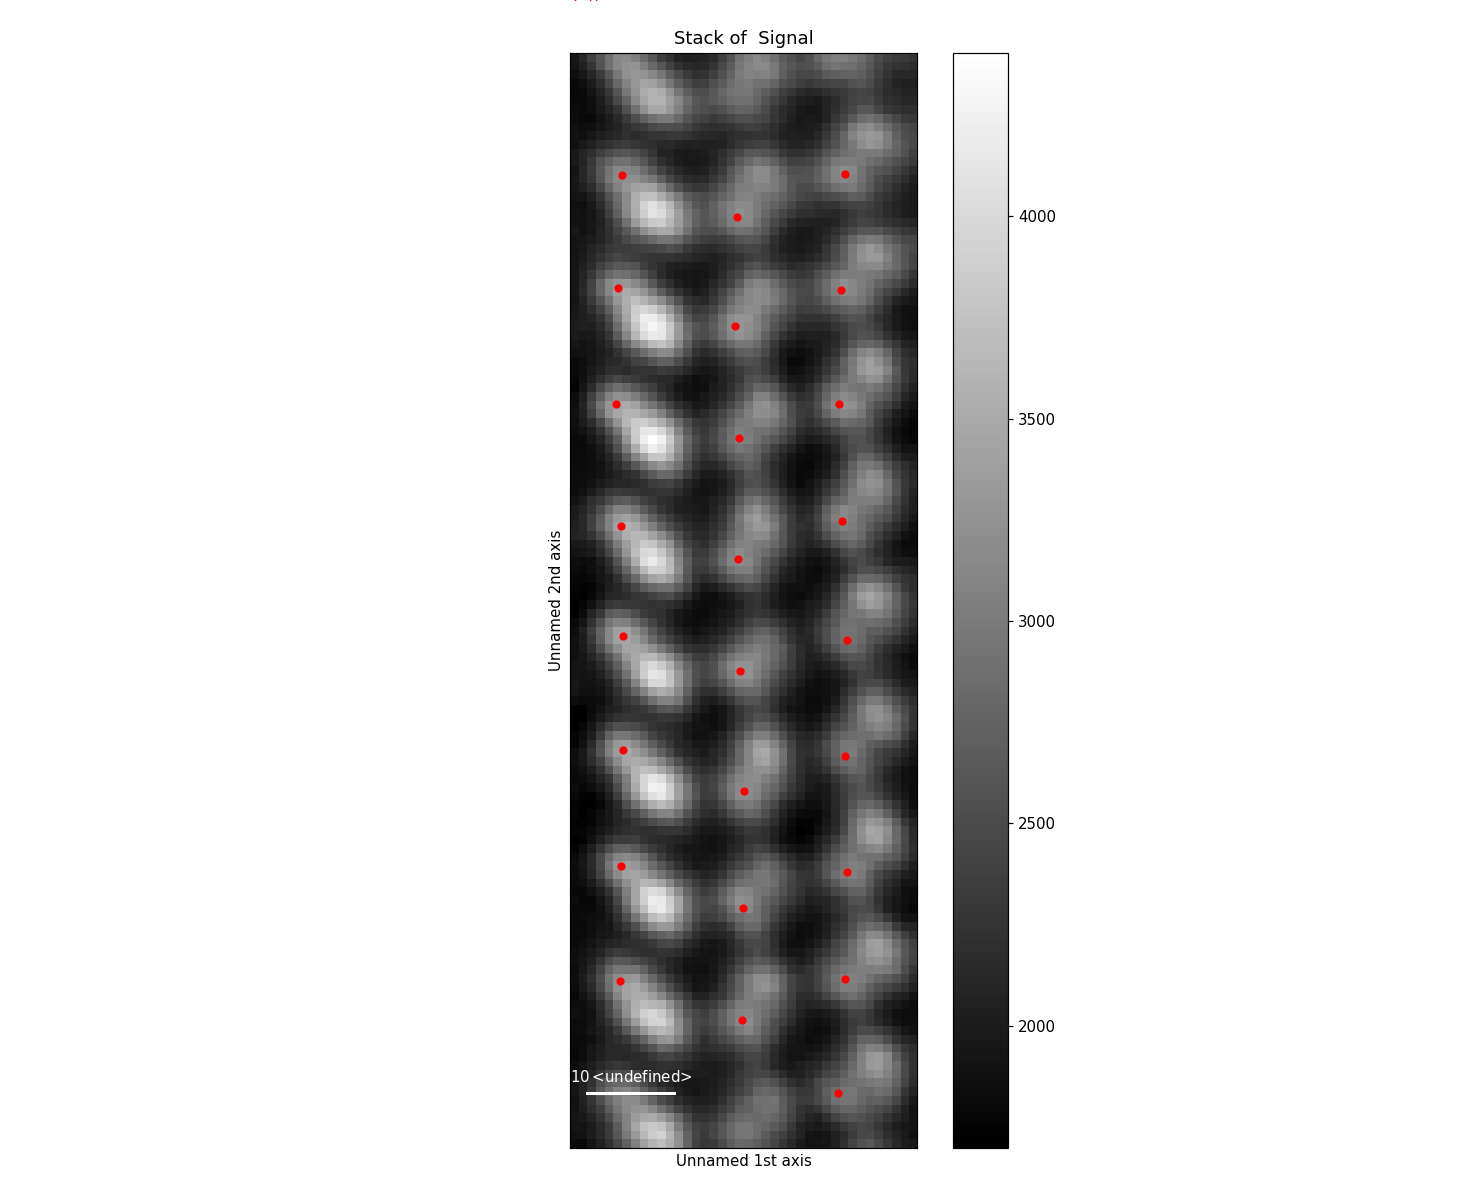

In [248]:
sublattice_B2.get_position_history().plot()

<IPython.core.display.Javascript object>


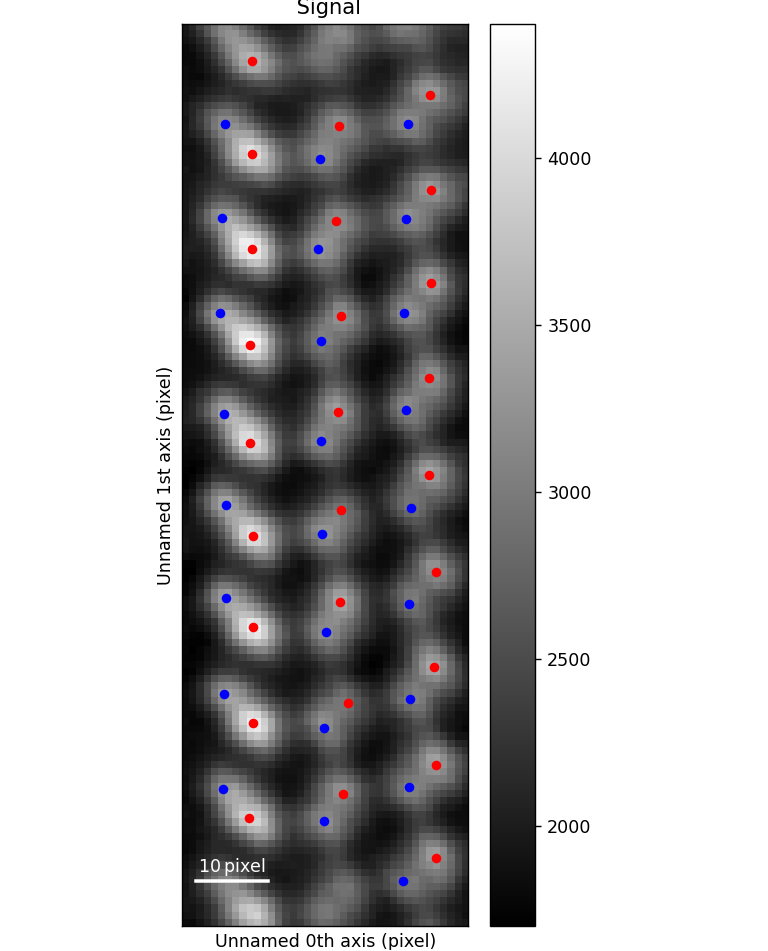

In [277]:
%matplotlib notebook
atom_lattice2 = am.Atom_Lattice(image=s_crop2.data, name='test2', sublattice_list=[sublattice_In2, sublattice_B2])
atom_lattice2.plot()

In [250]:
atom_lattice2.save("atom_lattice-2.hdf5", overwrite=True) 

In [307]:
blue_columns_x_ranges2 = [(4, 6)]
red_columns_x_ranges2 = [(7, 11)]
blue_coord2 = []
red_coord2 = []
# Function to slice the positions based on x range and calculate distances
def calculate_distances(sublattice_A, sublattice_B, blue_ranges, red_ranges):
    distances = []
    for blue_range, red_range in zip(blue_ranges, red_ranges):
        # Slice the x positions based on the given range
        blue_x = sublattice_B.x_position[(sublattice_B.x_position >= blue_range[0]) & (sublattice_B.x_position <= blue_range[1])]
        red_x = sublattice_A.x_position[(sublattice_A.x_position >= red_range[0]) & (sublattice_A.x_position <= red_range[1]) 
                & (sublattice_A.y_position > 5)]
        
        # Assuming that the y positions follow the same order as x positions
        blue_y = sublattice_B.y_position[(sublattice_B.x_position >= blue_range[0]) & (sublattice_B.x_position <= blue_range[1])]
        red_y = sublattice_A.y_position[(sublattice_A.x_position >= red_range[0]) & (sublattice_A.x_position <= red_range[1])
                                       & (sublattice_A.y_position > 5)]
        blue_coord2.append((blue_x,blue_y))
        red_coord2.append((red_x,red_y))
        # Calculate distances between all pairs of blue and red dots within the sliced range
        for bx, by in zip(blue_x, blue_y):
            for rx, ry in zip(red_x, red_y):
                distance = np.sqrt((bx - rx)**2 + (by - ry)**2)
                distances.append(distance)
    return distances


# Call the function and calculate distances
distances2 = calculate_distances(sublattice_In2, sublattice_B2, blue_columns_x_ranges2, red_columns_x_ranges2)
blue2_x_1,blue2_y_1 = blue_coord2[0][0],blue_coord2[0][1]
red2_x_1,red2_y_1  = red_coord2[0][0],red_coord2[0][1]

In [270]:
red_coord2

[(array([9.0272412 , 9.32857817, 9.35936721, 9.44132083, 8.99769217,
         9.44996562, 9.3211557 , 8.9063831 ]),
  array([ 44.35997312,  30.9232071 ,  83.70237729,  97.13614337,
          57.99432233,  70.9355078 ,  17.66482649, 110.44311356]))]

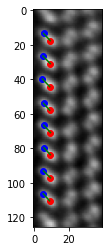

In [308]:
%matplotlib inline


plt.imshow(s_crop2.data, cmap='gray')
plt.scatter(blue2_x_1,blue2_y_1,color='b' )
plt.scatter(red2_x_1,red2_y_1,color='r' )
distance_list2 = []
distance_list2.extend(plot_distances(blue2_x_1, blue2_y_1, red2_x_1, red2_y_1, 'g-', x_scale))
plt.savefig('Figure2.tif')

In [272]:
import pickle

with open("blue_coord2.pkl", "wb") as f:
    pickle.dump(blue_coord2, f)
with open("red_coord2.pkl", "wb") as f:
    pickle.dump(red_coord2, f)

In [273]:
np.savez("blue_coord2.npz", *blue_coord2)
np.savez("red_coord2.npz", *red_coord2)

In [276]:
print('count =',len(distance_list2),f'average = {round(statistics.mean(distance_list2),3)}nm',
      f'std = {round(statistics.stdev(distance_list2),3)}nm')
np.savetxt('2nd distance',distance_list2)

count = 8 average = 0.151nm std = 0.008nm


In [287]:
blue_columns_x_ranges3 = (16,20),(29,32)
red_columns_x_ranges3 = (20,23),(33,36)
blue_coord3 = []
red_coord3 = []
# Function to slice the positions based on x range and calculate distances
def calculate_distances(sublattice_A, sublattice_B, blue_ranges, red_ranges):
    distances = []
    for blue_range, red_range in zip(blue_ranges, red_ranges):
        # Slice the x positions based on the given range
        blue_x = sublattice_B.x_position[(sublattice_B.x_position >= blue_range[0]) & (sublattice_B.x_position <= blue_range[1])]
        red_x = sublattice_A.x_position[(sublattice_A.x_position >= red_range[0]) & (sublattice_A.x_position <= red_range[1]) 
                & (sublattice_A.y_position > 5)]
        
        # Assuming that the y positions follow the same order as x positions
        blue_y = sublattice_B.y_position[(sublattice_B.x_position >= blue_range[0]) & (sublattice_B.x_position <= blue_range[1])]
        red_y = sublattice_A.y_position[(sublattice_A.x_position >= red_range[0]) & (sublattice_A.x_position <= red_range[1])
                                       & (sublattice_A.y_position > 5)]
        blue_coord3.append((blue_x,blue_y))
        red_coord3.append((red_x,red_y))
        # Calculate distances between all pairs of blue and red dots within the sliced range
        for bx, by in zip(blue_x, blue_y):
            for rx, ry in zip(red_x, red_y):
                distance = np.sqrt((bx - rx)**2 + (by - ry)**2)
                distances.append(distance)
    return distances


# Call the function and calculate distances
distances3 = calculate_distances(sublattice_In2, sublattice_B2, blue_columns_x_ranges3, red_columns_x_ranges3)
blue3_x_1,blue3_y_1 = blue_coord3[0][0],blue_coord3[0][1]
red3_x_1,red3_y_1  = red_coord3[0][0],red_coord3[0][1]
blue3_x_2,blue3_y_2 = blue_coord3[1][0],blue_coord3[1][1]
red3_x_2,red3_y_2  = red_coord3[1][0],red_coord3[1][1]

In [288]:
red_coord3

[(array([21.55178226, 21.9932805 , 21.66864311, 21.00139377, 21.31268049,
         21.67811719, 22.6448714 , 21.35308818]),
  array([ 80.15983256, 106.9896186 ,  40.32249569,  27.00505111,
          53.64850627,  67.34925665,  94.3285785 ,  13.67685634])),
 (array([34.29718933, 34.98881159, 34.06666057, 34.31850223, 34.0021733 ,
         34.99546929, 33.92041133, 34.6570071 , 34.99506421]),
  array([ 35.64054172, 115.99447615,   9.40747794,  22.64526152,
          49.00036496,  75.99375807,  62.4212138 ,  89.33047706,
         102.99086695]))]

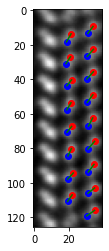

In [290]:
%matplotlib inline


plt.imshow(s_crop2.data, cmap='gray')
plt.scatter(blue3_x_1,blue3_y_1,color='b' )
plt.scatter(red3_x_1,red3_y_1,color='r' )
plt.scatter(blue3_x_2,blue3_y_2,color='b' )
plt.scatter(red3_x_2,red3_y_2,color='r' )
distance_list3 = []
distance_list3.extend(plot_distances(blue3_x_1, blue3_y_1, red3_x_1, red3_y_1, 'g-', x_scale))
distance_list3.extend(plot_distances(blue3_x_2, blue3_y_2, red3_x_2, red3_y_2, 'g-', x_scale))
plt.savefig('Figure3.tif')

In [291]:
import pickle

with open("blue_coord3.pkl", "wb") as f:
    pickle.dump(blue_coord2, f)
with open("red_coord3.pkl", "wb") as f:
    pickle.dump(red_coord2, f)
np.savez("blue_coord3.npz", *blue_coord3)
np.savez("red_coord3.npz", *red_coord3)

In [296]:
print('count =',len(distance_list3[:8]),f'average = {round(statistics.mean(distance_list3[:8]),3)}nm',
      f'std = {round(statistics.stdev(distance_list3[:8]),3)}nm')
print('count =',len(distance_list3[8:]),f'average = {round(statistics.mean(distance_list3[8:]),3)}nm',
      f'std = {round(statistics.stdev(distance_list3[8:]),3)}nm')
np.savetxt('3rd distance',distance_list3)

count = 8 average = 0.123nm std = 0.009nm
count = 9 average = 0.142nm std = 0.008nm


In [297]:
s_whole=s_temp.isig[85:195,360:499]

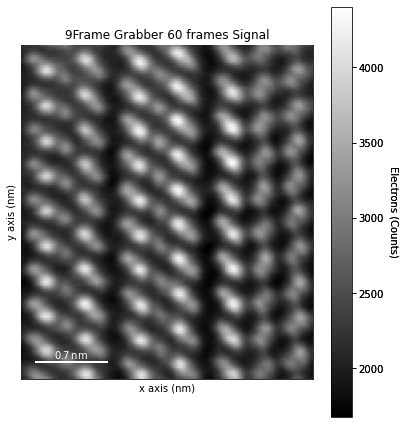

In [298]:
s_whole.plot()

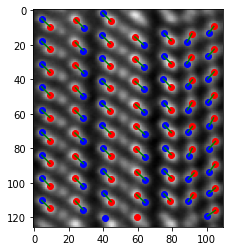

In [315]:
plt.imshow(s_whole.data, cmap='gray')
plt.scatter(blue_x_1,blue_y_1,color='b' )
plt.scatter(red_x_1,red_y_1,color='r' )
plt.scatter(blue_x_2,blue_y_2,color='b' )
plt.scatter(red_x_2,red_y_2,color='r' )
plt.scatter(blue_x_3,blue_y_3,color='b' )
plt.scatter(red_x_3,red_y_3,color='r' )
plt.scatter(blue_x_4,blue_y_4,color='b' )
plt.scatter(red_x_4,red_y_4,color='r' )
distance_list = []
plot_distances(blue_x_1, blue_y_1, red_x_1, red_y_1, 'g-', x_scale)
plot_distances(blue_x_2, blue_y_2, red_x_2, red_y_2, 'g-', x_scale)
plot_distances(blue_x_3, blue_y_3, red_x_3, red_y_3, 'g-', x_scale)
plot_distances(blue_x_4, blue_y_4, red_x_4, red_y_4, 'g-', x_scale)

shifted =155-85

plt.scatter(blue2_x_1+shifted,blue2_y_1,color='b' )
plt.scatter(red2_x_1+shifted,red2_y_1,color='r' )
plot_distances(blue2_x_1+shifted, blue2_y_1, red2_x_1+shifted, red2_y_1, 'g-', x_scale)

plt.scatter(blue3_x_1+shifted,blue3_y_1,color='b' )
plt.scatter(red3_x_1+shifted,red3_y_1,color='r' )
plt.scatter(blue3_x_2+shifted,blue3_y_2,color='b' )
plt.scatter(red3_x_2+shifted,red3_y_2,color='r' )
plot_distances(blue3_x_1+shifted, blue3_y_1, red3_x_1+shifted, red3_y_1, 'g-', x_scale)
plot_distances(blue3_x_2+shifted, blue3_y_2, red3_x_2+shifted, red3_y_2, 'g-', x_scale)
plt.savefig('Figure_whole.tif')

In [304]:
blue2_x_1+1

array([6.43952122, 6.06901325, 5.78387546, 6.41097788, 6.57960258,
       6.23815582, 6.63280127, 6.36313322])